In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
data = open("rtldata1.bin", "rb").read()
(serial_no, cfreq, srate, tv_sec, tv_nsec, bufsize) = struct.unpack("@IIIIII", data[:24])
fulltime1 = tv_sec + (tv_nsec/1e9)

print ("Device serial number was", serial_no)
print ("Timestamp was", fulltime1)
print ("Centre frequency was", cfreq)
print ("Sampling rate was", srate)
print ("Buffer size was", bufsize)

bindata1 = np.array(struct.unpack("B"*int(bufsize), data[24:])).astype(np.uint8)
bindata_complex1 = bindata1[0::2] + bindata1[1::2]*1j

Device serial number was 102
Timestamp was 1690460867.4182105
Centre frequency was 93700000
Sampling rate was 2000000
Buffer size was 8388608


In [3]:
struct.unpack("B"*int(bufsize), data[24:])[0:10]

(43, 255, 0, 0, 120, 83, 0, 255, 0, 0)

In [4]:
data2 = open("rtldata2.bin", "rb").read()
(serial_no, cfreq, srate, tv_sec, tv_nsec, bufsize) = struct.unpack("@IIIIII", data2[:24])
fulltime2 = tv_sec + (tv_nsec/1e9)

print ("Device serial number was", serial_no)
print ("Timestamp was", fulltime2)
print ("Centre frequency was", cfreq)
print ("Sampling rate was", srate)
print ("Buffer size was", bufsize)

bindata2 = np.array(struct.unpack("B"*int(bufsize), data2[24:])).astype(np.uint8)
bindata_complex2 = bindata2[0::2] + bindata2[1::2]*1j

Device serial number was 101
Timestamp was 1690460867.4337494
Centre frequency was 93700000
Sampling rate was 2000000
Buffer size was 8388608


In [5]:
struct.unpack("B"*int(bufsize), data2[24:])[0:10]

(193, 219, 143, 0, 255, 29, 163, 112, 211, 0)

In [6]:
Ncorr = 16384

if fulltime1 < fulltime2:
    tdiff = fulltime2 - fulltime1 
    Nsamps = int(tdiff*srate)
    print (Nsamps)
    datum_1 = bindata_complex1[Nsamps:Nsamps+Ncorr]
    datum_2 = bindata_complex2[0:Ncorr]
else:
    tdiff = fulltime1 - fulltime2 
    Nsamps = int(tdiff*srate)
    print (Nsamps)
    datum_1 = bindata_complex1[0:Ncorr]
    datum_2 = bindata_complex2[Nsamps:Nsamps+Ncorr]

corrdat = np.correlate(datum_1, datum_2, mode='full')
corrraw = np.correlate(bindata_complex1[0:Ncorr], bindata_complex2[0:Ncorr], mode='full')

norm = np.correlate(np.ones(Ncorr), np.ones(Ncorr), mode='full')

31077


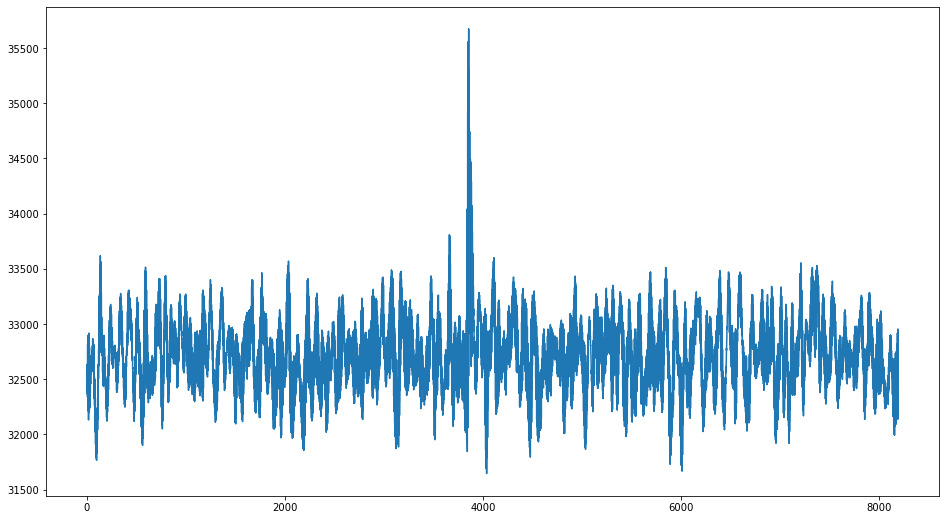

In [7]:
plt.figure(figsize=(16,9))
plt.plot((np.abs(corrdat)/norm)[int(3*Ncorr/4):-int(3*Ncorr/4)])
# plt.plot((np.abs(corrraw)/norm)[1000:-1000])

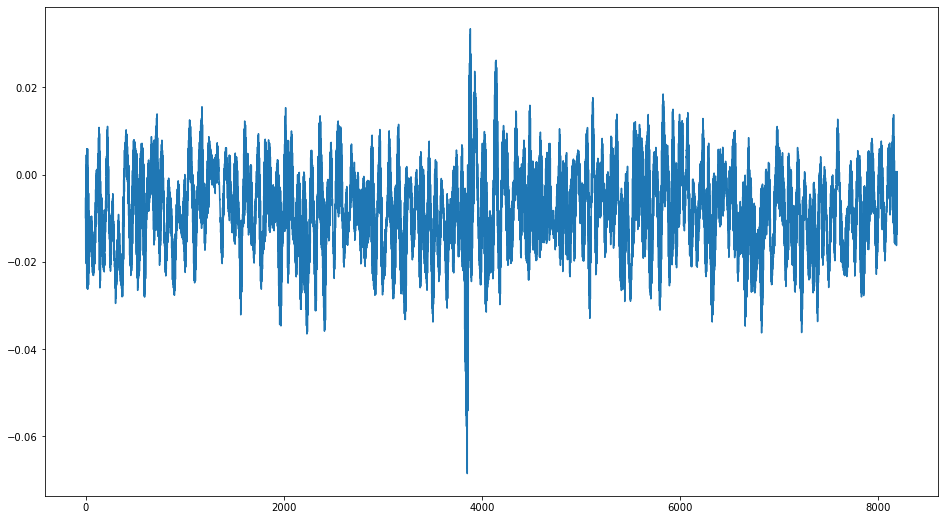

In [8]:
plt.figure(figsize=(16,9))
plt.plot((np.angle(corrdat))[int(3*Ncorr/4):-int(3*Ncorr/4)])


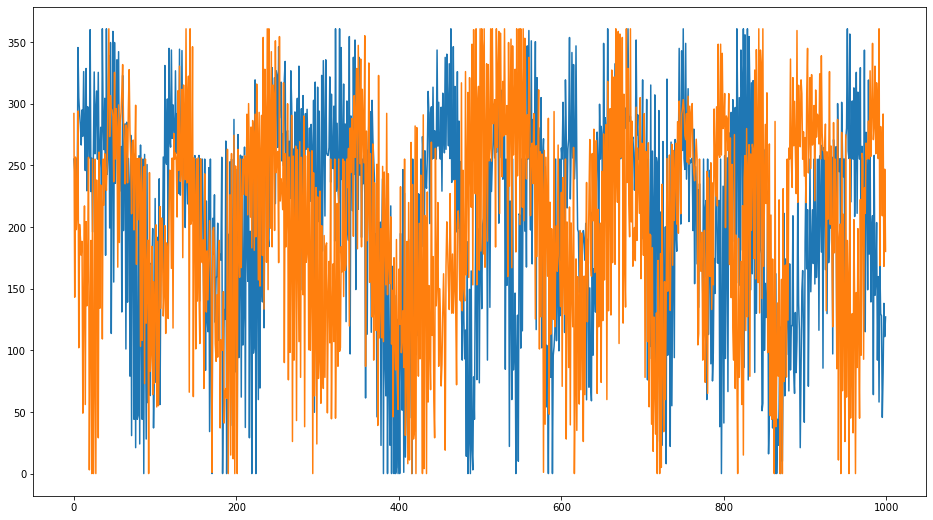

In [9]:
plt.figure(figsize=(16,9))
plt.plot(np.abs(datum_1[0:1000]))
plt.plot(np.abs(datum_2[0:1000]))

In [10]:
bindata2[10000]

116